# Descriptiva e Inferencia

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Datos de ejemplo: alturas de estudiantes universitarios
alturas = [172, 168, 179, 165, 176, 182, 170, 175, 167, 171, 169, 174, 178, 173, 177]

In [4]:
# Media
media = np.mean(alturas)
print(f"Media de las alturas: {media:.2f} cm")

# Mediana
mediana = np.median(alturas)
print(f"Mediana de las alturas: {mediana:.2f} cm")

# Desviación estándar
desv_std = np.std(alturas, ddof=1)
print(f"Desviación estándar de las alturas: {desv_std:.2f} cm")

Media de las alturas: 173.07 cm
Mediana de las alturas: 173.00 cm
Desviación estándar de las alturas: 4.83 cm


In [5]:
# Prueba de hipótesis para la media
media_nacional = 170
estadistico, p_valor = stats.ttest_1samp(alturas, media_nacional)

# Imprimir resultados
print(f"Estadístico de prueba: {estadistico:.2f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretación del valor p
alfa = 0.05
if p_valor < alfa:
    print("La media de las alturas de los estudiantes es significativamente diferente de la media nacional.")
else:
    print("No hay evidencia suficiente para afirmar que la media de las alturas de los estudiantes difiere de la media nacional.")

Estadístico de prueba: 2.46
Valor p: 0.0276
La media de las alturas de los estudiantes es significativamente diferente de la media nacional.


# POBLACION Y MUESTRA

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Simulación de datos de clientes
n_clientes = 10000
satisfaccion = np.random.normal(loc=4, scale=1, size=n_clientes)
clientes = pd.DataFrame({'satisfaccion': satisfaccion})

In [2]:
# Estadísticas descriptivas de la población
media_poblacion = clientes['satisfaccion'].mean()
desv_std_poblacion = clientes['satisfaccion'].std()

print(f"Media de satisfacción de la población: {media_poblacion:.2f}")
print(f"Desviación estándar de la población: {desv_std_poblacion:.2f}")

Media de satisfacción de la población: 4.00
Desviación estándar de la población: 0.99


In [6]:
# Tomar una muestra aleatoria de 100 clientes
muestra = clientes.sample(n=100, random_state=42) #Extraer informacion de clientes n, numero de datos, random_state = 42-> es para que se mantengan los datos ya generados previamente
muestra

,satisfaccion
6252,5.026452
4684,3.137173
1731,4.346170
4742,4.758950
4521,2.966257
...,...
3787,6.279997
9189,4.828993
7825,2.224832
7539,3.329914


In [7]:
# Estadísticas descriptivas de la muestra
media_muestra = muestra['satisfaccion'].mean()  #media
desv_std_muestra = muestra['satisfaccion'].std()    #desviacion estandar

print(f"Media de satisfacción de la muestra: {media_muestra:.2f}")
print(f"Desviación estándar de la muestra: {desv_std_muestra:.2f}")

Media de satisfacción de la muestra: 4.05
Desviación estándar de la muestra: 1.04


In [9]:
# Intervalo de confianza para la media de la población
confianza = 0.95
intervalo_confianza = stats.norm.interval(confianza, loc=media_muestra, scale=desv_std_muestra/np.sqrt(100)) #libreria stats permite permite generar intervalo de confianza,(nivel de confianza, loc->conjunto de datos, scale = desviacion estandar / n^2 (n=tamaño de la muestra))

print(f"Intervalo de confianza al {confianza*100}% para la media de satisfacción de la población, se encuentra entre estos rangos:")
print(intervalo_confianza)

Intervalo de confianza al 95.0% para la media de satisfacción de la población, se encuentra entre estos rangos:
(3.841807642444361, 4.249204789073407)


# Parámetro y estadístico

In [12]:
import numpy as np
from scipy import stats

# Generar datos de longitud de hojas (población)
np.random.seed(42)
longitud_hojas_poblacion = np.random.normal(loc=12, scale=2, size=10000) #loc -> media, scale -> desviacion estandar, size-> tamaño de muestra

In [20]:
# Parámetros de la población (desconocidos)
media_poblacion = np.mean(longitud_hojas_poblacion)
desv_std_poblacion = np.std(longitud_hojas_poblacion, ddof=1)

print("Datos obtenidos a partir de la poblacion")
print(f"Media de la longitud de hojas (parámetro μ): {media_poblacion:.2f} cm")
print(f"Desviación estándar de la longitud de hojas (parámetro σ): {desv_std_poblacion:.2f} cm")

Datos obtenidos a partir de la poblacion
Media de la longitud de hojas (parámetro μ): 12.00 cm
Desviación estándar de la longitud de hojas (parámetro σ): 2.01 cm


In [19]:
# Tomar una muestra de 50 hojas
longitud_hojas_muestra = np.random.choice(longitud_hojas_poblacion, size=50, replace=True)  #np.random.choice se utiliza cuando tus datos estan almacenados en un array, (dataframe).sample(n=100, random_state=42), sample se utiliza cuando tus datos estan almacenados en un dataframe             

# Estadísticos de la muestra
media_muestra = np.mean(longitud_hojas_muestra) #media
desv_std_muestra = np.std(longitud_hojas_muestra, ddof=1) #desviacion estandar

print("Datos obtenidos a partir de una muestra representativa:")
print(f"Media de la longitud de hojas (estadístico): {media_muestra:.2f} cm") 
print(f"Desviación estándar de la longitud de hojas (estadístico): {desv_std_muestra:.2f} cm")

Datos obtenidos a partir de una muestra representativa:
Media de la longitud de hojas (estadístico): 11.77 cm
Desviación estándar de la longitud de hojas (estadístico): 1.66 cm


In [17]:
longitud_hojas_muestra #datos se encuentran almacenados en un array

array([15.19729434,  9.53379739, 16.55165086, 10.64451006, 15.34453181,
       11.95426388, 12.39643466, 10.95821419,  9.57851475, 10.86224605,
       12.76248931,  9.084897  ,  8.66647319,  7.58886789, 14.90965235,
       12.59315109, 14.74454263, 12.94527953, 10.67642707, 13.35789398,
       10.42132299, 12.06554728, 14.30469728, 10.05787594, 11.02864251,
       12.95150398, 14.45606042, 15.53090848,  9.84664175, 11.74518626,
       10.93757141, 13.48652819, 11.29697303, 14.01282208, 12.81537947,
       11.51323204, 12.62744637, 10.66861307, 11.96147924, 10.27301279,
       12.28717587, 11.76800586, 16.73482873,  8.47391969, 10.84645734,
        8.73732978, 14.78384178, 16.87950481, 12.66462802, 14.21636563])

In [18]:
# Intervalo de confianza para la media de la población
confianza = 0.95
intervalo_confianza = stats.norm.interval(confianza, loc=media_muestra, scale=desv_std_muestra/np.sqrt(50))

print(f"Intervalo de confianza al {confianza*100}% para la media de la longitud de hojas en la población:")
print(intervalo_confianza)

Intervalo de confianza al 95.0% para la media de la longitud de hojas en la población:
(11.566951873330478, 12.82283348985596)


# Muestreo

In [27]:
import numpy as np
import pandas as pd

# Generar datos de ingresos de la población
np.random.seed(42)
ingresos_poblacion = np.random.normal(loc=50000, scale=10000, size=1000) #(media, varianza, tamaño de muestra)
ingresos_poblacion


array([54967.14153011, 48617.35698829, 56476.88538101, 65230.29856408,
       47658.46625277, 47658.63043051, 65792.12815507, 57674.34729153,
       45305.25614065, 55425.60043586, 45365.82307188, 45342.7024643 ,
       52419.62271566, 30867.19755342, 32750.82167487, 44377.12470759,
       39871.68879666, 53142.47332595, 40919.75924479, 35876.96298665,
       64656.48768922, 47742.23699513, 50675.28204688, 35752.51813787,
       44556.17275475, 51109.2258971 , 38490.06422578, 53756.98018346,
       43993.61310081, 47083.06250207, 43982.93387771, 68522.78184509,
       49865.02775262, 39422.89071044, 58225.44912103, 37791.56350029,
       52088.63595005, 30403.2987612 , 36718.13951102, 51968.61235869,
       57384.66579995, 51713.6828119 , 48843.51717612, 46988.96304411,
       35214.78009633, 42801.55791605, 45393.6122904 , 60571.22226219,
       53436.18289568, 32369.59844637, 53240.83969395, 46149.17719584,
       43230.77999694, 56116.76288841, 60309.99522496, 59312.80119116,
      

In [28]:
poblacion = pd.DataFrame({'ingresos': ingresos_poblacion}) #convertir los datos que estan en un array a un dataframe
poblacion

,ingresos
0,54967.141530
1,48617.356988
2,56476.885381
3,65230.298564
4,47658.466253
...,...
995,47188.997071
996,67976.865268
997,56408.428613
998,44288.210102


Muestreo aleatorio simple

In [29]:
# Muestreo aleatorio simple

muestra_aleatoria = poblacion.sample(n=100, random_state=42) #tomamos una muestra de 100 elementos de 100, y mantenemos esos datos en memoria
print("Muestra aleatoria simple:")
print(muestra_aleatoria.head())

Muestra aleatoria simple:
         ingresos
521  55433.601924
737  59826.909839
740  31591.257687
660  44263.379931
411  38753.579082


# Muestreo estratificado

In [31]:
# Muestreo estratificado
# escojer una caracteristica parlticular de la muestra, en este caso ingresos bajo, medio , alto y escojer una muestra del 10% de cada grupo
poblacion['estrato'] = np.where(poblacion['ingresos'] < 40000, 'bajo',  np.where(poblacion['ingresos'] < 60000, 'medio', 'alto')) #agrupar por ingresos bajo, medio, alto

#agrupar datos por bajo, medio, alto. Luego extraer los datos 10% de cada grupo
muestra_estratificada = poblacion.groupby('estrato').apply(lambda x: x.sample(frac=0.1, random_state=42)) #sample(frax-> extraer un porcetaje de los datos (10%),mantener en memoria)
print("\nMuestra estratificada:")
print(muestra_estratificada.head())


Muestra estratificada:
                 ingresos estrato
estrato                          
alto    603  63556.378588    alto
        913  65774.532798    alto
        252  71221.561970    alto
        234  71439.440893    alto
        819  60654.803751    alto


C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\1529733891.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  muestra_estratificada = poblacion.groupby('estrato').apply(lambda x: x.sample(frac=0.1, random_state=42))


In [35]:
#agrupar por ingresos bajo, medio, alto
np.where(poblacion['ingresos'] < 40000, 'bajo',  np.where(poblacion['ingresos'] < 60000, 'medio', 'alto')) #agrupar por ingresos bajo, medio, alto



array(['medio', 'medio', 'medio', 'alto', 'medio', 'medio', 'alto',
       'medio', 'medio', 'medio', 'medio', 'medio', 'medio', 'bajo',
       'bajo', 'medio', 'bajo', 'medio', 'medio', 'bajo', 'alto', 'medio',
       'medio', 'bajo', 'medio', 'medio', 'bajo', 'medio', 'medio',
       'medio', 'medio', 'alto', 'medio', 'bajo', 'medio', 'bajo',
       'medio', 'bajo', 'bajo', 'medio', 'medio', 'medio', 'medio',
       'medio', 'bajo', 'medio', 'medio', 'alto', 'medio', 'bajo',
       'medio', 'medio', 'medio', 'medio', 'alto', 'medio', 'medio',
       'medio', 'medio', 'medio', 'medio', 'medio', 'bajo', 'bajo',
       'medio', 'alto', 'medio', 'alto', 'medio', 'medio', 'medio',
       'alto', 'medio', 'alto', 'bajo', 'medio', 'medio', 'medio',
       'medio', 'bajo', 'medio', 'medio', 'alto', 'medio', 'medio',
       'medio', 'medio', 'medio', 'medio', 'medio', 'medio', 'medio',
       'medio', 'medio', 'medio', 'bajo', 'medio', 'medio', 'medio',
       'medio', 'bajo', 'medio', 'medio

In [37]:
#separar por grupos alto, medio, bajo y sacar la media
poblacion.groupby('estrato').ingresos.mean()

estrato
alto     65602.373910
bajo     35174.983012
medio    49934.427077
Name: ingresos, dtype: float64

In [38]:
poblacion.estrato.value_counts()

estrato
medio    698
alto     155
bajo     147
Name: count, dtype: int64

In [39]:
muestra_estratificada.estrato.value_counts() #10% de los datos escojidos

estrato
medio    70
alto     16
bajo     15
Name: count, dtype: int64

# Muestreo sistemático

In [40]:
# Muestreo sistemático

#consiste en establecer un punto aleatorio y a partir de ese punto empezar a recolectar datos (tomar muestras) de cada grupo

inicio_aleatorio = np.random.randint(0, 100) #escojer un punto aleatorio
intervalo = len(poblacion) // 100
indices = [inicio_aleatorio + i * intervalo for i in range(100)]

# Ensure that the indices are within the bounds of the DataFrame
indices = [min(max(index, 0), len(poblacion) - 1) for index in indices]
muestra_sistematica = poblacion.iloc[indices]

print("\nMuestra sistemática:")
print(muestra_sistematica.head())


Muestra sistemática:
        ingresos estrato
43  46988.963044   medio
53  56116.762888   medio
63  38037.933759    bajo
73  65646.436558    alto
83  44817.297817   medio


# Distribución muestral

Supongamos que queremos estudiar la distribución de las alturas de una población. Primero, generaremos datos aleatorios para simular la población.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos de la población
np.random.seed(42)
poblacion = np.random.normal(loc=170, scale=10, size=10000) #media = 170, (desviacion estandar) varianza = 10, numero de muestras = 10000

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\4014530365.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(poblacion, hist=False, kde=True, label='Población')


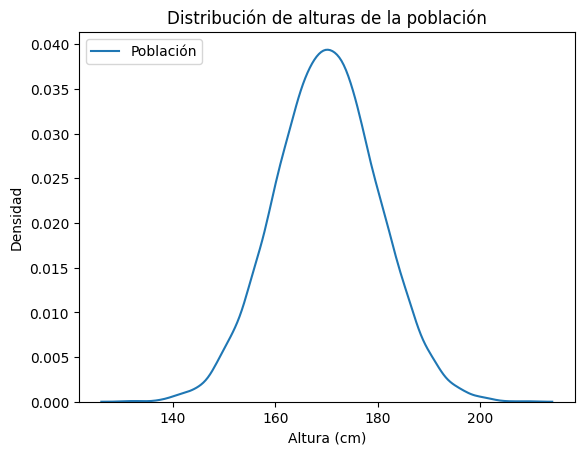

In [51]:
# Visualizar la distribución de la población
sns.distplot(poblacion, hist=False, kde=True, label='Población')
plt.title('Distribución de alturas de la población')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad')
plt.legend(loc='upper left')
plt.show()

> Observamos que la distribución de la población sigue aproximadamente una distribución normal con una media de 170 cm y una desviación estándar de 10 cm.

Ahora, tomaremos múltiples muestras aleatorias de la población y calcularemos la media de cada muestra. Esto nos permitirá visualizar la distribución muestral de las medias.

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\2519561226.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_muestras, hist=False, kde=True, label='Distribución muestral de las medias')


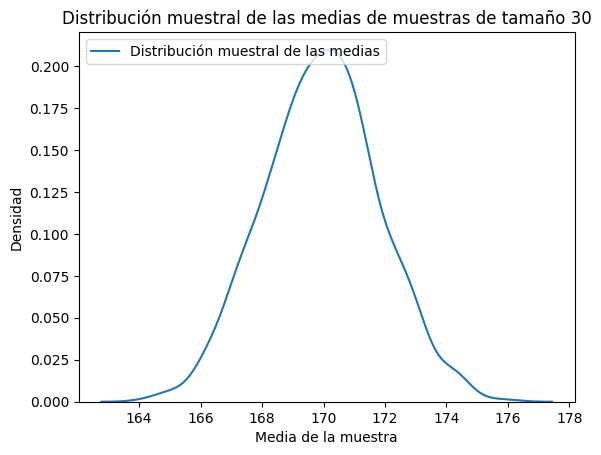

In [57]:
# Calcular medias de muestras aleatorias
n_muestras = 1000 #1000 repeticion
tamano_muestra = 30 #agarrar 30 datos
medias_muestras = []

for _ in range(n_muestras):
    #escojer 30 datos aleatorios del total de la poblacion
    muestra = np.random.choice(poblacion, size=tamano_muestra, replace=True) #(poblacion, tamaño de muestras, si ya escojieron un valor a la siguiente iteracion se puede volver a escojer dicho valor)
    media_muestra = np.mean(muestra) #media muestral
    medias_muestras.append(media_muestra)

# Visualizar la distribución muestral de las medias
sns.distplot(medias_muestras, hist=False, kde=True, label='Distribución muestral de las medias')
plt.title('Distribución muestral de las medias de muestras de tamaño 30')
plt.xlabel('Media de la muestra')
plt.ylabel('Densidad')
plt.legend(loc='upper left')
plt.show()

> Observamos que la distribución muestral de las medias se aproxima a una distribución normal, incluso cuando la distribución de la población no es exactamente normal (aunque en este caso sí lo es). Esto se debe al teorema del límite central, que establece que a medida que el tamaño de la muestra aumenta, la distribución muestral de las medias se acerca a una distribución normal, independientemente de la forma de la distribución de la población.

# Efecto del tamaño de la muestra

Podemos ver cómo el tamaño de la muestra afecta la distribución muestral de las medias. A medida que aumenta el tamaño de la muestra, la distribución se acerca aún más a la normalidad.

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\3398993479.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_muestras, hist=False, kde=True, ax=axs[i], label=f'Tamaño de muestra={n}')
C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\3398993479.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

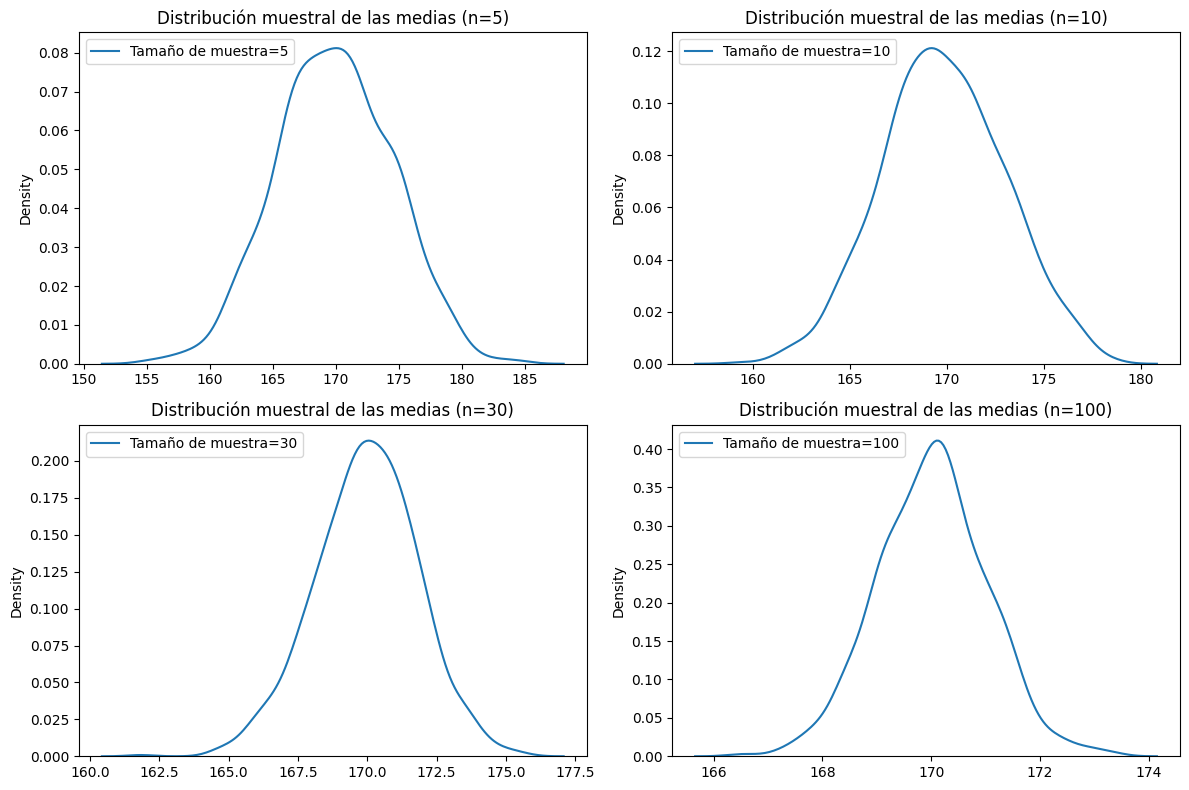

In [59]:
# Visualizar distribuciones muestrales para diferentes tamaños de muestra
tamanos_muestra = [5, 10, 30, 100]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, n in enumerate(tamanos_muestra):
    medias_muestras = []
    for _ in range(n_muestras):
        muestra = np.random.choice(poblacion, size=n, replace=True)
        media_muestra = np.mean(muestra)
        medias_muestras.append(media_muestra)

    sns.distplot(medias_muestras, hist=False, kde=True, ax=axs[i], label=f'Tamaño de muestra={n}')
    axs[i].set_title(f'Distribución muestral de las medias (n={n})')
    axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

> En este ejemplo, hemos simulado una población y tomado múltiples muestras aleatorias de diferentes tamaños. Observamos que la distribución muestral de las medias se aproxima a una distribución normal a medida que el tamaño de la muestra aumenta, ilustrando el teorema del límite central.



# Distribución muestral de la media

Supongamos que queremos estudiar la distribución muestral de las medias de los pesos de una población de personas adultas. Primero, generaremos datos aleatorios para simular la población.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos de la población
np.random.seed(42)
poblacion_pesos = np.random.normal(loc=70, scale=10, size=100000)

Ahora, tomaremos múltiples muestras aleatorias de la población y calcularemos la media de cada muestra. Esto nos permitirá visualizar la distribución muestral de las medias.

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\4027534779.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_muestras, hist=False, kde=True, label='Distribución muestral de las medias')


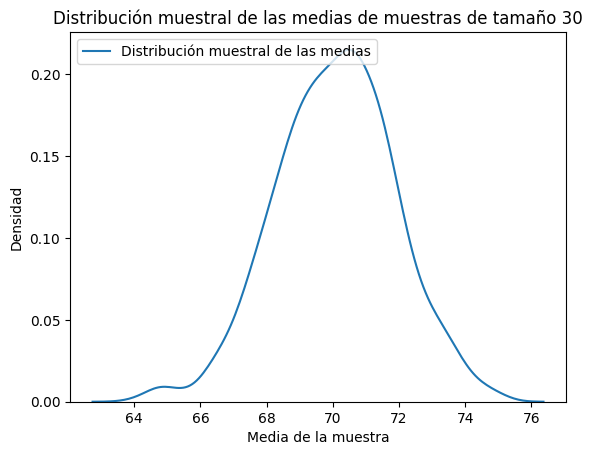

In [64]:
# Calcular medias de muestras aleatorias
n_muestras = 1000 #1000 simulaciones
tamano_muestra = 30
medias_muestras = []

for _ in range(n_muestras):
    muestra = np.random.choice(poblacion_pesos, size=tamano_muestra, replace=True)
    media_muestra = np.mean(muestra)
    medias_muestras.append(media_muestra)

# Visualizar la distribución muestral de las medias
sns.distplot(medias_muestras, hist=False, kde=True, label='Distribución muestral de las medias')
plt.title('Distribución muestral de las medias de muestras de tamaño 30')
plt.xlabel('Media de la muestra')
plt.ylabel('Densidad')
plt.legend(loc='upper left')
plt.show()

# Distribución muestral de la proporión

Supongamos que queremos estudiar la proporción de personas en una población que tienen un cierto atributo (por ejemplo, fumadores)

In [66]:
# Generar datos de la población (fumadores y no fumadores) 
probabilidad_fumador = 0.3 #la probabildad de ocurrencia de las personas que son fumadoras es del 30%
poblacion_fumadores = np.random.choice([0, 1], size=100000, p=[1-probabilidad_fumador, probabilidad_fumador]) #0= no fumador, 1= fumados, generamos 100000 datos, probabilidad de no fumador 1-p, probabilidad de fumador

Tomaremos múltiples muestras aleatorias de la población y calcularemos la proporción de fumadores en cada muestra. Esto nos permitirá visualizar la distribución muestral de las proporciones.

In [67]:
# Calcular proporciones de muestras aleatorias
n_muestras = 1000 #replicar 1000 veces
tamano_muestra = 50
proporciones_muestras = []

for _ in range(n_muestras):
    muestra = np.random.choice(poblacion_fumadores, size=tamano_muestra, replace=True)
    proporcion_muestra = np.mean(muestra)
    proporciones_muestras.append(proporcion_muestra)

C:\Users\dg_su\AppData\Local\Temp\ipykernel_20268\455268932.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proporciones_muestras, hist=False, kde=True, label='Distribución muestral de las proporciones')


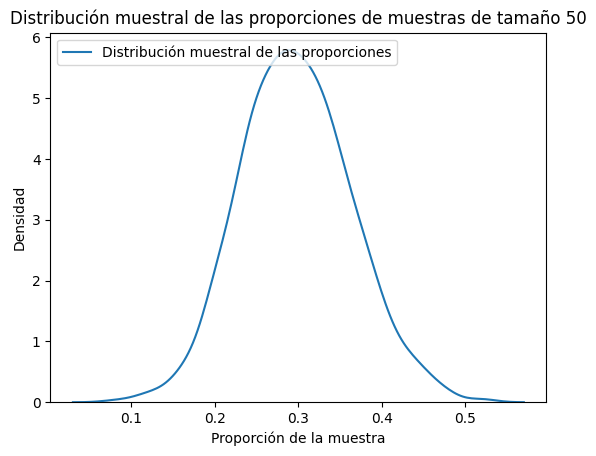

In [68]:
# Visualizar la distribución muestral de las proporciones
sns.distplot(proporciones_muestras, hist=False, kde=True, label='Distribución muestral de las proporciones')
plt.title('Distribución muestral de las proporciones de muestras de tamaño 50')
plt.xlabel('Proporción de la muestra')
plt.ylabel('Densidad')
plt.legend(loc='upper left')
plt.show()

> Hemos simulado una población y tomado múltiples muestras aleatorias para estudiar las distribuciones muestrales de la media y la proporción.

> Observamos que tanto la distribución muestral de las medias como la distribución muestral de las proporciones se aproximan a una distribución normal a medida que aumenta el tamaño de la muestra, de acuerdo con el teorema del límite central.



# Estimación
Supongamos que estamos interesados en estudiar el tiempo de vida de cierto componente electrónico. Generaremos datos aleatorios que simulan los tiempos de vida de una muestra de estos componentes.

In [69]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar datos de muestra
np.random.seed(42)

#generar una distribucion exponencial
tiempos_vida = np.random.exponential(scale=5, size=1000) #probabilidad de ocurrencia, tamaño de muestra

# Estimación puntual
La estimación puntual implica calcular un valor único, como una estadística muestral, que se utiliza como estimador del parámetro de interés de la población.

In [70]:
# Estimación puntual de la media (es el promedio es la estimacion de la media) 
media_muestral = np.mean(tiempos_vida)
print(f"Estimación puntual de la media del tiempo de vida: {media_muestral:.2f}")

Estimación puntual de la media del tiempo de vida: 4.86


En este caso, hemos utilizado la media muestral como un estimador puntual de la media del tiempo de vida de la población.

# Estimación por intervalos
La estimación por intervalos, en cambio, proporciona un rango de valores plausibles dentro del cual se espera que se encuentre el parámetro de interés con cierto nivel de confianza.

In [73]:
# Estimación por intervalos de la media
confianza = 0.95
n = len(tiempos_vida) #calcular el tamaño de la muestra
desv_std_muestral = np.std(tiempos_vida, ddof=1) #cacula la desviacion muestral de la muestra [media muestral, ddof=1 -> considerar desviacion estandar poblacional]
error_std = desv_std_muestral / np.sqrt(n)  #calcula el error estandar
intervalo = stats.norm.interval(confianza, loc=media_muestral, scale=error_std)

print(f"Intervalo de confianza al {confianza*100}% para la media del tiempo de vida:")
print(intervalo)

Intervalo de confianza al 95.0% para la media del tiempo de vida:
(4.5611513416713425, 5.163908137980901)


> Hemos construido un intervalo de confianza del 95% para la media del tiempo de vida de la población utilizando la media muestral y la desviación estándar muestral.

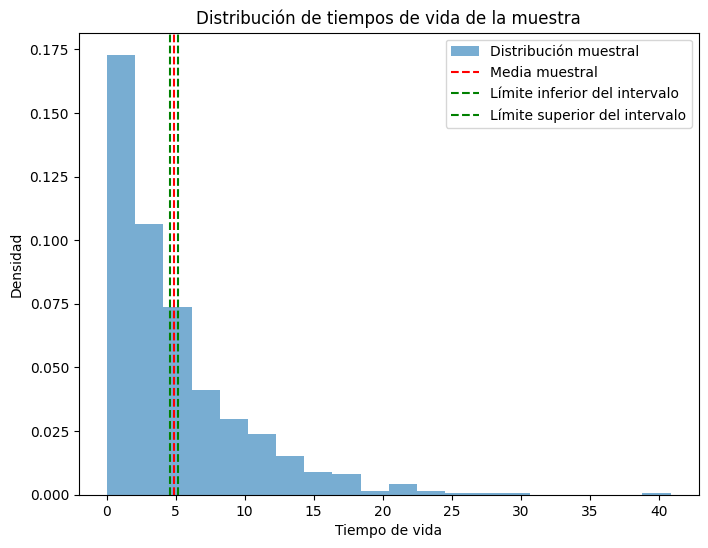

In [74]:
# Visualización
plt.figure(figsize=(8, 6))
plt.hist(tiempos_vida, bins=20, density=True, alpha=0.6, label='Distribución muestral')
plt.axvline(media_muestral, color='r', linestyle='--', label='Media muestral')
plt.axvline(intervalo[0], color='g', linestyle='--', label='Límite inferior del intervalo')
plt.axvline(intervalo[1], color='g', linestyle='--', label='Límite superior del intervalo')
plt.title('Distribución de tiempos de vida de la muestra')
plt.xlabel('Tiempo de vida')
plt.ylabel('Densidad')
plt.legend()
plt.show()

La distribucion exponencial es de esta forma

# Simulación de un intervalo de confianza

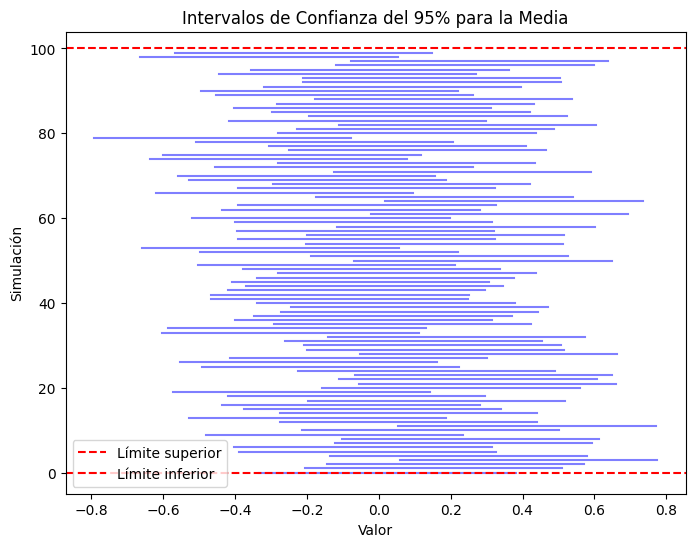

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la población
mu = 0  # Media de la población
sigma = 1  # Desviación estándar de la población
n = 30  # Tamaño de la muestra
num_simulaciones = 100  # Número de simulaciones

# Función para calcular el intervalo de confianza
def calcular_intervalo_confianza(muestra):
    media_muestral = np.mean(muestra)
    error_std = sigma / np.sqrt(n)
    intervalo = norm.interval(0.95, loc=media_muestral, scale=error_std)
    return intervalo

# Simular intervalos de confianza
intervalos = []
for _ in range(num_simulaciones):
    muestra = np.random.normal(mu, sigma, n)
    intervalo = calcular_intervalo_confianza(muestra)
    intervalos.append(intervalo)

# Convertir los intervalos a un array de NumPy
intervalos = np.array(intervalos)

# Gráfica de los intervalos de confianza simulados
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(num_simulaciones):
    ax.plot([intervalos[i, 0], intervalos[i, 1]], [i, i], color='b', alpha=0.5)
ax.axhline(y=num_simulaciones, color='r', linestyle='--', label='Límite superior')
ax.axhline(y=0, color='r', linestyle='--', label='Límite inferior')
ax.set_xlabel('Valor')
ax.set_ylabel('Simulación')
ax.set_title('Intervalos de Confianza del 95% para la Media')
ax.legend()
plt.show()

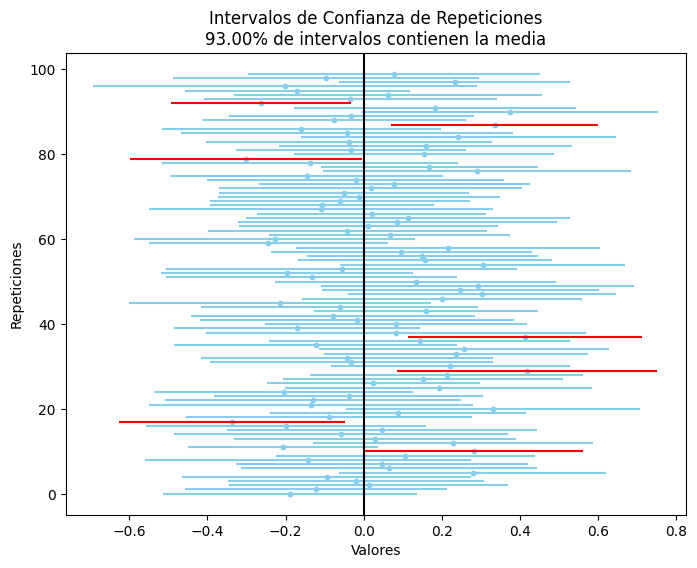

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
np.random.seed(42) # Fijar la semilla para la reproducibilidad
n_replicas = 100 # Número de réplicas o muestra
n = 30 # Tamaño de cada muestra, aumentando el tamaño de la muestra, los resultados son mas robustos
alpha = 0.05 # Nivel de significancia (95% de confianza)

# Función para generar datos y calcular intervalos de confianza
def generate_confidence_intervals(n_replicas, n, alpha):
    intervals = []
    for _ in range(n_replicas):
        sample = np.random.normal(loc=0, scale=1, size=n)
        sample_mean = np.mean(sample) # Calcular la media muestral
        sample_se = np.std(sample, ddof=1) / np.sqrt(n) # Calcular el error estándar
        # z_score = np.abs(np.random.normal(loc=0, scale=1))
        z_score = 1.96  # Valor crítico para un nivel de confianza del 95%
        margin_of_error = z_score * sample_se # Calcular el margen de error
        interval = (sample_mean - margin_of_error, sample_mean + margin_of_error) # Intervalo de confianza
        intervals.append(interval)
    return intervals

# Generar intervalos de confianza
intervals = generate_confidence_intervals(n_replicas, n, alpha)

# Contar cuántos intervalos contienen la media (valor 0)
count_contains_mean = sum(1 for interval in intervals if interval[0] <= 0 <= interval[1])
percentage_contains_mean = (count_contains_mean / n_replicas) * 100 # Calcular el porcentaje

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
for i, interval in enumerate(intervals):
    lower, upper = interval
    if lower <= 0 <= upper:
        color = 'skyblue'  # El intervalo toca la media
    else:
        color = 'red'   # El intervalo no toca la media
    plt.plot([lower, upper], [i, i], color=color)
    plt.scatter((lower + upper) / 2, i, color='skyblue', s=10)

# Configurar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Repeticiones')
plt.title(f'Intervalos de Confianza de Repeticiones\n{percentage_contains_mean:.2f}% de intervalos contienen la media')
plt.axvline(x=0, color='black', linestyle='-')
plt.show()


# Tamaño de muestra

## Estimación de la Proporción de Clientes Satisfechos

Supongamos que una empresa quiere estimar la proporción de clientes satisfechos con un nivel de confianza del 95% y un margen de error del 5%. Basándonos en estudios previos, se estima (proporcion) que alrededor del 50% de los clientes están satisfechos.



\begin{equation}
n = \frac{Z_{\alpha/2}^2 \cdot \hat{p} (1 - \hat{p})}{E^2}
\end{equation}

In [78]:
import numpy as np
from scipy.stats import norm

# Parámetros del problema
confidence_level = 0.95  # Nivel de confianza
margin_of_error = 0.05   # Margen de error
estimated_proportion = 0.5  # Proporción estimada de clientes satisfechos

In [79]:
# Cálculo del valor crítico Z
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha / 2)

In [82]:
# Cálculo del tamaño de muestra
sample_size = (z_score**2 * estimated_proportion * (1 - estimated_proportion)) / (margin_of_error**2)
sample_size = int(np.ceil(sample_size))  # Redondear 

In [81]:
# Mostrar resultados
print(f"Nivel de confianza: {confidence_level * 100}%")
print(f"Margen de error: {margin_of_error * 100}%")
print(f"Proporción estimada: {estimated_proportion * 100}%")
print(f"Tamaño de muestra necesario: {sample_size}")

Nivel de confianza: 95.0%
Margen de error: 5.0%
Proporción estimada: 50.0%
Tamaño de muestra necesario: 385


# Otras variaciones del tamaño de muestra

In [84]:
import numpy as np
from scipy.stats import norm

def calculate_sample_size(confidence_level, margin_of_error, estimated_proportion):
    alpha = 1 - confidence_level
    z_score = norm.ppf(1 - alpha / 2)
    sample_size = (z_score**2 * estimated_proportion * (1 - estimated_proportion)) / (margin_of_error**2)
    return int(np.ceil(sample_size))

# Parámetros
confidence_level = 0.95  # Nivel de confianza
margin_of_error = 0.05   # Margen de error
estimated_proportion = 0.5  # Proporción estimada de la característica de interés

# Calcular tamaño de muestra
sample_size = calculate_sample_size(confidence_level, margin_of_error, estimated_proportion)

print(f"Nivel de confianza: {confidence_level * 100}%")
print(f"Margen de error: {margin_of_error * 100}%")
print(f"Proporción estimada: {estimated_proportion * 100}%")
print(f"Tamaño de muestra necesario: {sample_size}")


Nivel de confianza: 95.0%
Margen de error: 5.0%
Proporción estimada: 50.0%
Tamaño de muestra necesario: 385


In [85]:
# Parámetros adicionales para comparación
margin_of_error_2 = 0.01  # Margen de error más pequeño
confidence_level_2 = 0.99  # Mayor nivel de confianza

# Calcular tamaños de muestra para diferentes parámetros
sample_size_1 = calculate_sample_size(confidence_level, margin_of_error, estimated_proportion)
sample_size_2 = calculate_sample_size(confidence_level, margin_of_error_2, estimated_proportion)
sample_size_3 = calculate_sample_size(confidence_level_2, margin_of_error, estimated_proportion)

print(f"Tamaño de muestra con 95% confianza y 5% margen de error: {sample_size_1}")
print(f"Tamaño de muestra con 95% confianza y 1% margen de error: {sample_size_2}")
print(f"Tamaño de muestra con 99% confianza y 5% margen de error: {sample_size_3}")


Tamaño de muestra con 95% confianza y 5% margen de error: 385
Tamaño de muestra con 95% confianza y 1% margen de error: 9604
Tamaño de muestra con 99% confianza y 5% margen de error: 664


Conclusión:

- Margen de Error: Directamente afecta la precisión de la estimación; cuanto más pequeño, mayor será el tamaño de muestra requerido.

- Nivel de Confianza: Aumentar el nivel de confianza incrementa el valor crítico Z, lo que también incrementa el tamaño de muestra necesario para mantener el mismo margen de error.

# Remuestreo

## Bootstrap

In [86]:
import numpy as np
from sklearn.utils import resample

# Generar datos sintéticos
np.random.seed(0)
data = np.random.randn(100)  # Conjunto de datos con 100 muestras

# Parámetros Bootstrap
n_iterations = 100  # Número de iteraciones
n_size = int(len(data) * 0.50)  # Tamaño de la muestra bootstrap

# Lista para almacenar las medias de cada muestra bootstrap
means = []

# Aplicar Bootstrap
for i in range(n_iterations):
    sample = resample(data, n_samples=n_size)
    sample_mean = np.mean(sample)
    means.append(sample_mean)

# Calcular la media y el intervalo de confianza
bootstrap_mean = np.mean(means)
confidence_interval = np.percentile(means, [2.5, 97.5])

print(f"Bootstrap Mean: {bootstrap_mean}")
print(f"95% Confidence Interval: {confidence_interval}")

Bootstrap Mean: 0.09043532244052244
95% Confidence Interval: [-0.12728318  0.39085504]


## Cross Validation

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Generar datos sintéticos con etiquetas
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.binomial(1, 0.5, 100)

# Aplicar Cross-Validation
model = LogisticRegression()
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-Fold Cross-Validation

# Calcular la media y desviación estándar de las puntuaciones
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean CV Score: {mean_cv_score}")
print(f"Std CV Score: {std_cv_score}")

Mean CV Score: 0.5700000000000001
Std CV Score: 0.08124038404635961
